# Mutual Information
- we'll rank the features with mutual information and investigate the results by data visualization.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("../../data/feature_engineering/Automobile_data.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


## Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding

In [25]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

 ## Scikit-learn has two mutual information metrics in its feature_selection module
 - **mutual_info_regression** : real-valued targets
 - **mutual_info_classif** : categorical targets


In [26]:
# price is real-valued.
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.538036
highway_mpg          0.950782
length               0.606131
fuel_system          0.479961
stroke               0.380195
num_of_cylinders     0.330281
compression_ratio    0.133958
fuel_type            0.047298
Name: MI Scores, dtype: float64

 ## A bar plot to make comparisions easier

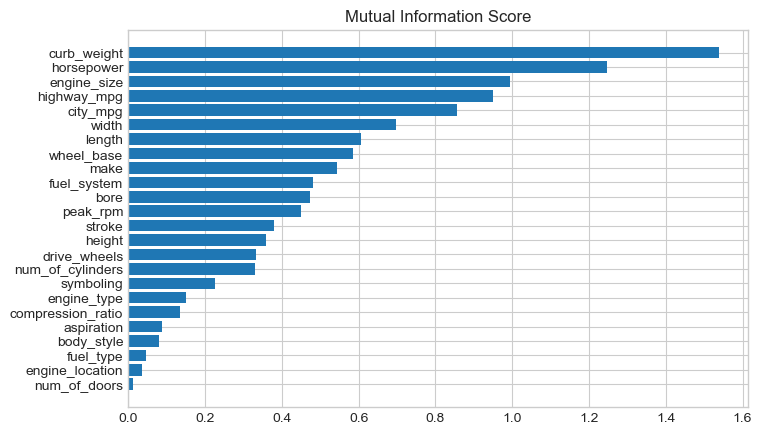

In [30]:
def plot_utility_score(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Score")
    
plt.figure(dpi=100, figsize=(8,5))
plot_utility_score(mi_scores)

## the high-scoring curb_weight feature exhibits a strong relationship with price

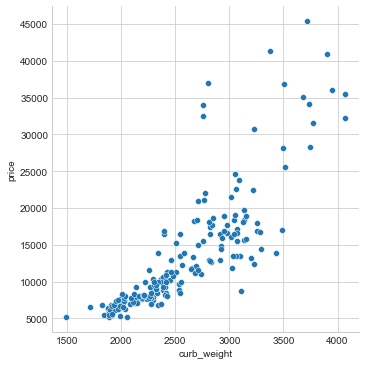

In [32]:
sns.relplot(x="curb_weight", y="price", data=df);

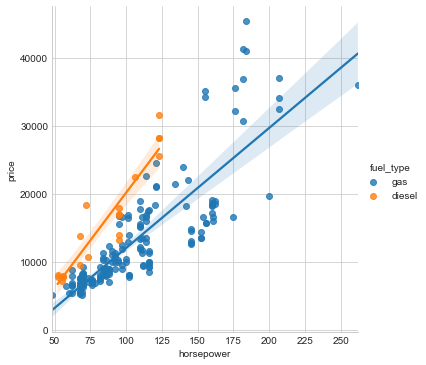

In [33]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);